In [23]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import math
import matplotlib
%matplotlib inline

## 1

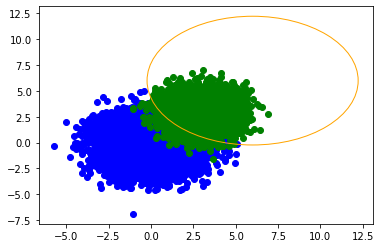

In [24]:
mu1 = np.array([0,0])
mu2 = np.array([3,3])
sigma2 = np.array([[1,0], [0,1]])
sigma1 = np.array([[2,0],[0,2]])

bivariate1 = np.random.multivariate_normal(mu1, sigma1, 10000)
bivariate2 = np.random.multivariate_normal(mu2, sigma2, 10000)
x1 = [pair[0] for pair in bivariate1]
y1 = [pair[1] for pair in bivariate1]
x2 = [pair[0] for pair in bivariate2]
y2 = [pair[1] for pair in bivariate2]

fig,ax = plt.subplots(1)
plt.scatter(x1,y1, color='blue')
plt.scatter(x2,y2, color='green')

#circle help from https://stackoverflow.com/questions/34902477/drawing-circles-on-image-with-matplotlib-and-numpy
circ = matplotlib.patches.Circle((6,6), math.sqrt(2*math.log(4)+36), color="orange", fill=False)
ax.add_patch(circ)

In [103]:
correct_w1, incorrect_w1, correct_w2, incorrect_w2 = 0, 0, 0, 0
for x,y in bivariate1:
    if (x - 6)**2 + (y - 6)**2 > 2 * math.log(4) + 36:
        correct_w1 += 1
    else:
        incorrect_w1 += 1       
for x,y in bivariate2:
    if (x - 6)**2 + (y - 6)**2 > 2 * math.log(4) + 36:
        incorrect_w2 += 1
    else:
        correct_w2 += 1           
total = correct_w1+incorrect_w1+correct_w2+incorrect_w2
correct_total = correct_w1 + correct_w2
incorrect_total = incorrect_w1 + incorrect_w2
confusion = np.array([[correct_w1, incorrect_w1],[incorrect_w2, correct_w2]])
print("confusion matrix = ")
print(confusion)
print("Emperical Error Rate = {}".format(incorrect_total/total))

confusion matrix = 
[[ 991    9]
 [   0 1000]]
Emperical Error Rate = 0.0045


## 2

In [123]:
mu = np.array([0,0])
sigma = np.array([[20, 10],[10, 30]])

d,p = np.linalg.eig(sigma)
A = p*(d**(-1/2))
print("Aw")
print(A)

Aw
[[-0.22882456 -0.0874032 ]
 [ 0.14142136 -0.14142136]]


## after applying the transform the density function more like changes to a spherical function that takes the data and is in a more compact range of x and y values.

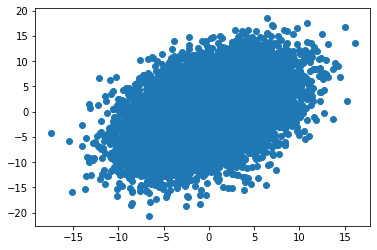

In [27]:
rnd = np.random.multivariate_normal(mu, sigma, 10000)
x = [pair[0] for pair in rnd]
y = [pair[1] for pair in rnd]

plt.scatter(x,y)

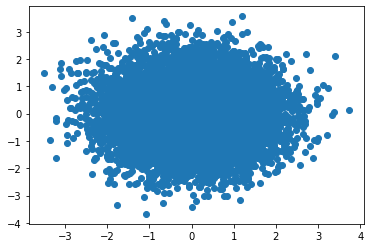

In [28]:
wht_rnd = [np.dot(A.T, pair) for pair in rnd]
x = [pair[0] for pair in wht_rnd]
y = [pair[1] for pair in wht_rnd]

plt.scatter(x,y)

## Comapared to part c this distribution is more like in a circular shape and is not tilted. And the range of the x,y values also changed.

## 4

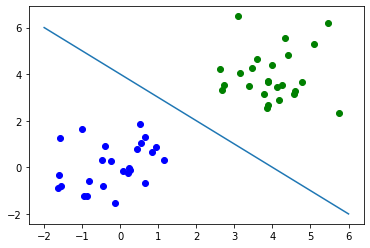

In [120]:
mu1 = np.array([0,0])
mu2 = np.array([4,4])
sigma2 = np.array([[1,0], [0,1]])
sigma1 = np.array([[1,0],[0,1]])

bivariate1 = np.random.multivariate_normal(mu1, sigma1, 25)
bivariate2 = np.random.multivariate_normal(mu2, sigma2, 25)
x1 = [pair[0] for pair in bivariate1]
y1 = [pair[1] for pair in bivariate1]
x2 = [pair[0] for pair in bivariate2]
y2 = [pair[1] for pair in bivariate2]

x = np.arange(-2,7 ,1)
y = 4-x

fig,ax = plt.subplots(1)
plt.scatter(x1,y1, color='blue')
plt.scatter(x2,y2, color='green')
plt.plot(x,y)

In [122]:
correct_w1, incorrect_w1, correct_w2, incorrect_w2 = 0, 0, 0, 0
for x,y in bivariate1:
    if y< 4-x:
        correct_w1 += 1
    else:
        incorrect_w1 += 1      
for x,y in bivariate2:
    if  y< 4-x:
        incorrect_w2 += 1
    else:
        correct_w2 += 1
            
total = correct_w1+incorrect_w1+correct_w2+incorrect_w2
correct_total = correct_w1 + correct_w2
incorrect_total = incorrect_w1 + incorrect_w2
print("confusion matrix = ")
print(confusion)
print("Emperical Error Rate = {}".format(incorrect_total/total))

confusion matrix = 
[[25  0]
 [ 0 25]]
Emperical Error Rate = 0.0


In [114]:

n = [100, 500, 1000, 5000,  10000, 25000, 50000 , 75000, 100000, 200000, 500000]
error = []
for i in n:
    
    bivariate1 = np.random.multivariate_normal(mu1, sigma1, i)
    bivariate2 = np.random.multivariate_normal(mu2, sigma2, i)
    x1 = [pair[0] for pair in bivariate1]
    y1 = [pair[1] for pair in bivariate1]
    x2 = [pair[0] for pair in bivariate2]
    y2 = [pair[1] for pair in bivariate2]
    # Find correctly and incorrectly classified data points
    correct_w1, incorrect_w1, correct_w2, incorrect_w2 = 0, 0, 0, 0
    for x,y in bivariate1:
        if y< 4-x:
            correct_w1 += 1
        else:
            incorrect_w1 += 1

    for x,y in bivariate2:
        if  y< 4-x:
            incorrect_w2 += 1
        else:
            correct_w2 += 1

    total = correct_w1+incorrect_w1+correct_w2+incorrect_w2
    correct_total = correct_w1 + correct_w2
    incorrect_total = incorrect_w1 + incorrect_w2
    error.append(incorrect_total/total)
sns.lineplot(n,error)    
print(error)




Correctly classified: 997675 data points (498783 as w1 and 498892 as w2)
Incorrectly classified: 2325 data points(1217 as w1 and 1108 as w2)
Total: 1000000 data points
Error rate 2325/1000000 = 0.002325

confusion matrix =
[[498783   1217]
 [  1108 498892]]


## As seen in the above graph that the emperical error rate fluctuates at small values of n but after a value of 10000 the error rate almost becomes constant after running it multiple times I achieved the same result. So error rate did not cross the bound of 0.00915 that we calculated.The theoretical value is guaranteed and when the empirical ratio exceeds the theoretical value we have to impute this to the stochastic fluctuation of the former.

## 5

6.304859329329322 11.531318884394246


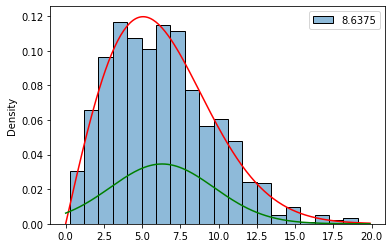

In [99]:
import pandas as pd
import seaborn as sns  
# read text file into pandas DataFrame
df = pd.read_csv("hw3.txt", sep="\n")
mle = len(df.iloc[:,0].tolist())/sum([i ** 2 for i in df.iloc[:,0].tolist()])
x = np.arange(0, 20,0.1)
y = 2 * mle * x * np.exp(-mle * x**2)

mu = sum(df.iloc[:,0].tolist())/len(df.iloc[:,0].tolist())
sigma = sum([(i - mu)**2 for i in df.iloc[:,0].tolist()])/len(df.iloc[:,0].tolist())

x1 = np.arange(0, 20,0.1)
pdf = []
for i in x:
    pdf.append( (1/(math.sqrt(2 * math.pi) * sigma)) * math.exp((-1/2) * ((i - mu))**2/sigma))

# display DataFrame
ax = sns.histplot(data=df,  stat='density')
ax.plot(x,y, color = 'r')
ax.plot(x1,pdf, color = 'g')

print(mu,sigma)

## The Rayleigh distribution fits better to the data as it follows all the bins almost perfectly whereas the Gaussian distribution is follows the bins ups and downs but not as greatly as the other one.